In [1]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from trajectory.gsolver import * 


[2500     187↗   562@5000  ↘250        0]


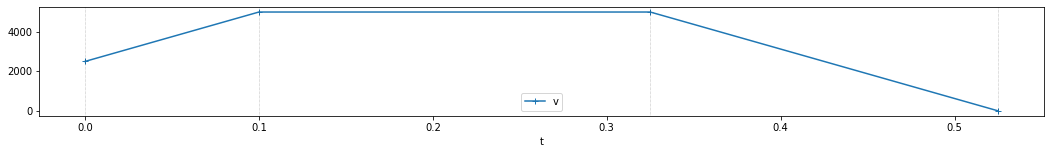

In [37]:
from trajectory.gsolver import ACDBlock

j = Joint(5000, 50_000)
x =  1000
v_0 = 2500
v_1 = 0  

class B(ACDBlock):
    
    def solve(self, t):
        pass
     
    @property
    def calc_area_acd(self):
        return np.array([
            (self.v_0+self.v_c)/2*self.t_a,
            self.v_c*self.t_c,
            (self.v_c+self.v_1)/2*self.t_d])

    @property
    def x_acd(self):
        return np.array([self.x_a, self.x_c, self.x_d])
    
    @property
    def x_err_acd(self):
        return self.x_acd-self.calc_area_acd
    

b.plot()

print(b.str())

-93.74999999999999 0.0 -156.25
0.0
[nan nan nan]


/var/folders/kp/jn04x74j43j9v0t6cl0574h00000gn/T/ipykernel_18184/83032274.py:15: RuntimeWarning: invalid value encountered in double_scalars
  b.v_c+=(xc/b.t_c)


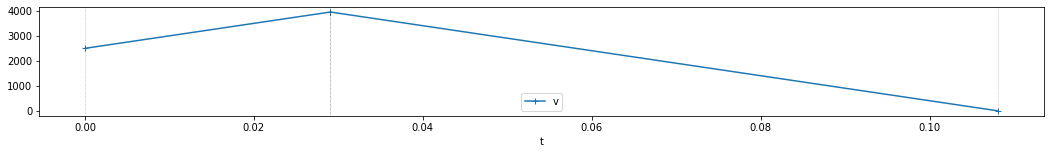

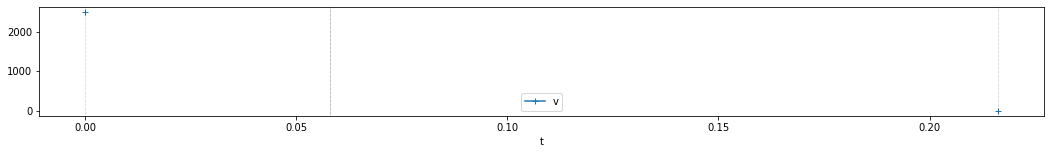

In [53]:
x =  250
v_0 = 2500
v_1 = 0  

b = B(x,v_0=v_0,v_1=v_1, joint=j).init()
b.plot()

t_n = b.t*2
b.t_a, b.t_c, b.t_d = np.array([b.t_a, b.t_c, b.t_d])/b.t * t_n


xa,xc,xd = b.x_err_acd
print(xa,xc,xd)
print(xc)
b.v_c+=(xc/b.t_c)
print(b.x_err_acd)
b.plot()

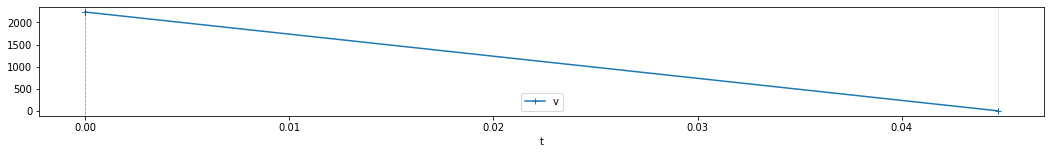

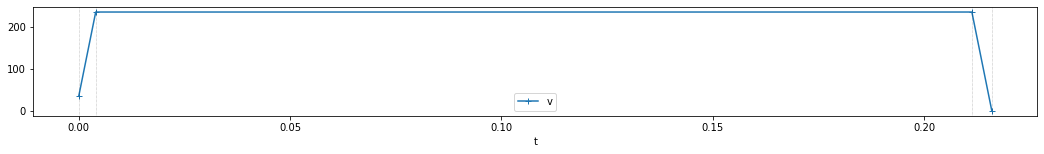

In [57]:
x =  50
v_0 = 2500
v_1 = 5000  

b = B(x,v_0=v_0,v_1=v_1, joint=j).init()
b.plot()

b.plan_trap(t_n)
b.plot()

In [30]:
xc

-562.5